# Understanding the data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('C:\program_py\datas\matala2_cosmetics_2019-Nov.csv')
#print(data)
#print(data.head(70))

C:\Users\97250\AppData\Local\Temp\ipykernel_8568\1546683647.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\program_py\datas\matala2_cosmetics_2019-Nov.csv')


In [2]:
data.isnull().sum().sort_values()

event_time             0
event_type             0
product_id             0
category_id            0
price                  0
user_id                0
user_session         813
brand            1986029
category_code    4560089
dtype: int64

In [3]:
data.dtypes

event_time       object
event_type       object
product_id        int64
category_id       int64
category_code    object
brand            object
price            object
user_id           int64
user_session     object
dtype: object

## Question 1

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'] )

In [ ]:
data = data.sort_values(['user_session', 'event_time'])

In [6]:
data = data.sort_values(['user_session', 'event_time'])
data["duration_to_next_event"] = data.groupby('user_session')['event_time'].diff(periods=-1).abs().dt.total_seconds()
data["duration_to_next_event"] = data["duration_to_next_event"].fillna(0)
data = data.reset_index(drop=True)
data.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-05 07:57:05+00:00,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
1,2019-11-11 12:15:10+00:00,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0
2,2019-11-15 03:50:03+00:00,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0
3,2019-11-13 04:37:37+00:00,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0
4,2019-11-14 03:59:32+00:00,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0
5,2019-11-14 04:00:28+00:00,view,5861619,1487580008246412266,NaN,lador,6.38,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,95.0
6,2019-11-14 04:02:03+00:00,view,5861591,1487580009143992338,NaN,lador,2.22,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,0.0
7,2019-11-03 12:45:44+00:00,view,5846437,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,11.0
8,2019-11-03 12:45:55+00:00,view,5846436,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,0.0
9,2019-11-15 22:03:28+00:00,view,5847576,1982860263572898112,NaN,concept,7.78,530580938,0000645a-8160-4a3d-91bf-154bff0a22e3,287.0


## Question 2

In [7]:
from datetime import timedelta
data = data.sort_values(['user_id', 'event_time'])
data['time_diff'] = data.groupby('user_id')['event_time'].diff(periods=1).dt.days.fillna(0)
data["panel"] = (data['user_id'].shift(1) != data['user_id']) | ((data['user_session'].shift(1) != data['user_session']) & (data['time_diff']>=5)  & (data['user_id'].shift(1) == data['user_id']))
data['funnel_number'] = data.groupby('user_id')['panel'].cumsum()
data = data.drop(['time_diff',"panel"], axis=1)
data.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
2898910,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1
2898911,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1
2898912,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1
2445875,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1
4238793,2019-11-30 23:59:58+00:00,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0.0,1


### just for me

In [10]:
unique_count = data['funnel_number'].nunique()
print(unique_count)
print(data['funnel_number'].unique())

5
[1 2 3 4 5]


## Question 3

In [14]:
data["index"] = (data['user_id'].shift(1) == data['user_id'] )& (data['user_session'].shift(1) != data['user_session']) & (data['funnel_number'].shift(1) == data['funnel_number'])
data["index_in_panel"] = data.groupby('user_id')["index"].cumsum() + 1
data = data.drop("index", axis=1)
data.head(20)


#sample_data = data.groupby('funnel_number').apply(lambda x: x.sample(n=1))
#sample_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_panel
3767565,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
3206183,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
1884703,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2638368,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
2638369,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3
2638370,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3
2638371,2019-11-20 12:00:07+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,171.0,1,3
2638372,2019-11-20 12:02:58+00:00,view,5712576,1487580005008409427,NaN,f.o.x,6.03,1458813,921ff98c-a419-4132-af94-ee26880334b0,260.0,1,3
2638373,2019-11-20 12:07:18+00:00,view,5905673,1487580005008409427,NaN,NaN,0.0,1458813,921ff98c-a419-4132-af94-ee26880334b0,251.0,1,3
2638374,2019-11-20 12:11:29+00:00,view,5727766,1487580005008409427,NaN,f.o.x,4.83,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3


## Question 4

In [15]:
data = data.astype({'price':str})
data[['price']].sort_values(by = 'price',ascending=False).head()

,price
2429921,Net 7.3
2863693,Net 6.35
4528575,Net 5.02
4204129,Net 4.76
4592327,Net 4.11


In [16]:
def decimal(column):
    match = re.search(r'\d+\.\d+', str(column))
    if match:
        return float(match.group())
    else:
        return None

data['price'] = data['price'].apply(decimal)

### check 

In [21]:
relevant_indexes = [2429921, 2863693, 4528575]
relevant_data = data.loc[data.index.isin(relevant_indexes), 'price']
print(relevant_data)


2863693    6.35
4528575    5.02
2429921    7.30
Name: price, dtype: float64


## Question 5

In [22]:
unique_values = data['event_type'].unique()
num_unique_values = len(unique_values)
print(f"There are {num_unique_values} unique values in the 'event_type' column:")
print(unique_values)

There are 4 unique values in the 'event_type' column:
['view' 'cart' 'remove_from_cart' 'purchase']


In [23]:
type_data = data.groupby('event_type')[['event_type']].count()

<AxesSubplot:xlabel='event_type', ylabel='count'>

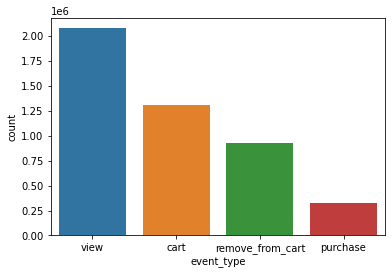

In [24]:
sns.countplot(x='event_type', data=data)

## Question 6

In [35]:
new_data  = data.groupby('user_session', group_keys=False)[['user_id']].max()
new_data['funnel_number'] = data.groupby('user_session', group_keys=False)[['funnel_number']].max()
new_data['index_in_funnel'] = data.groupby('user_session', group_keys=False)[['index_in_panel']].max()
new_data['events_for_session'] = data.groupby('user_session', group_keys=False)[['event_time']].count()
new_data['session_time(seconds)'] = data.groupby('user_session', group_keys=False)[["duration_to_next_event"]].sum()
new_data 

,user_id,funnel_number,index_in_funnel,events_for_session,session_time(seconds)
user_session,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.0
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,1,0.0
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,0.0
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,6,1,0.0
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,3,151.0
...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,0.0
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,1,2,74.0
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,4,1,0.0


In [36]:
cart = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list)
view = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list)
purchase = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list)

merged = pd.concat([cart, view, purchase], axis=1, join='outer')
merged.columns = ['cart', 'view', 'purchase']
merged

,cart,view,purchase
user_session,,,
0000d72e-be5f-4a03-9f17-6ac81584f177,"[5739493, 5569528, 5813882]","[59996, 5739492, 5739493, 5739493, 5739493, 57...",NaN
00013c7b-c898-4104-8f12-2d8ecc19f9d2,[5818396],[5818396],NaN
00015a13-22ab-4133-9967-b61fff626002,[5810668],"[5810668, 5773158]",NaN
0001ac6b-3229-4627-9b8e-000cbf0dcbfd,"[5700037, 5700035, 5700037, 5700037, 5700035, ...","[5854897, 5854897, 5854897, 5700037, 5700035, ...",NaN
00024159-a4ae-4e4f-b830-9f4ae9d1cc9d,[5892094],"[5892094, 5892094, 60007]",NaN
...,...,...,...
ffd30abe-5314-4471-9c78-38d1e6ce270e,NaN,NaN,"[4185, 5614842, 5622687]"
ffdf6b60-2908-acda-5bd2-743662b374ba,NaN,NaN,"[5897627, 5550016, 5678261, 5816170]"
ffe2ef30-781f-4db1-eb77-b390af228533,NaN,NaN,"[5552, 5665816, 5883088, 5833330, 5665820]"


In [37]:
session_data = pd.concat([new_data,merged], axis=1, join='outer')
session_data

,user_id,funnel_number,index_in_funnel,events_for_session,session_time(seconds),cart,view,purchase
user_session,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.0,NaN,[5829298],NaN
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,1,0.0,NaN,[5771614],NaN
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,0.0,NaN,[5568472],NaN
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,6,1,0.0,NaN,[5864850],NaN
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,3,151.0,NaN,"[5861620, 5861619, 5861591]",NaN
...,...,...,...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,0.0,NaN,[5790563],NaN
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,1,2,74.0,NaN,"[5588154, 5676246]",NaN
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,4,1,0.0,NaN,[5847328],NaN
